In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [24]:
df=pd.read_csv("Advertising.csv")
df

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [26]:
df=df.drop(columns="ID")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [29]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [28]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [27]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [15]:
df.corr

<bound method DataFrame.corr of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

In [30]:
df.nunique()

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

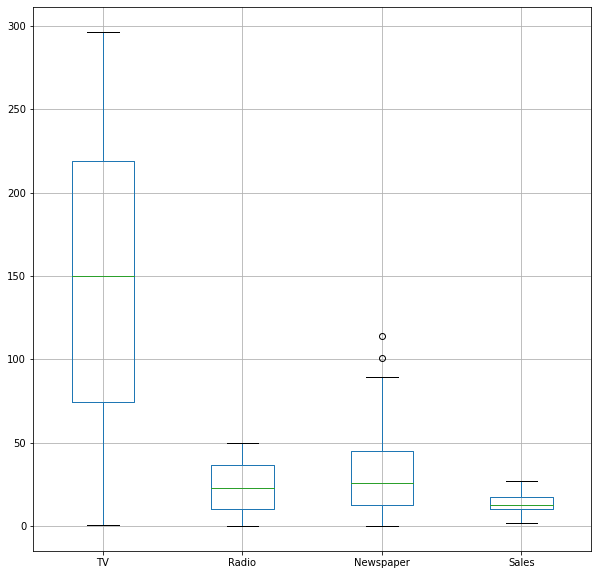

In [17]:
plt.figure(figsize=(10,10))
df.boxplot()


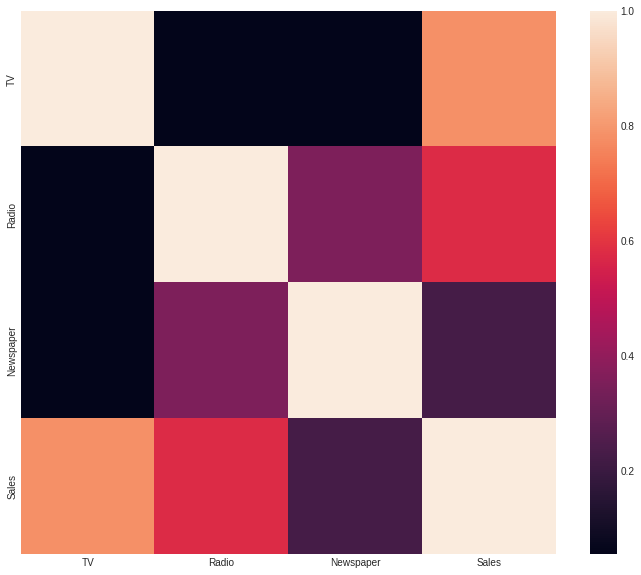

In [22]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,10))
sns.heatmap(df.corr())
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


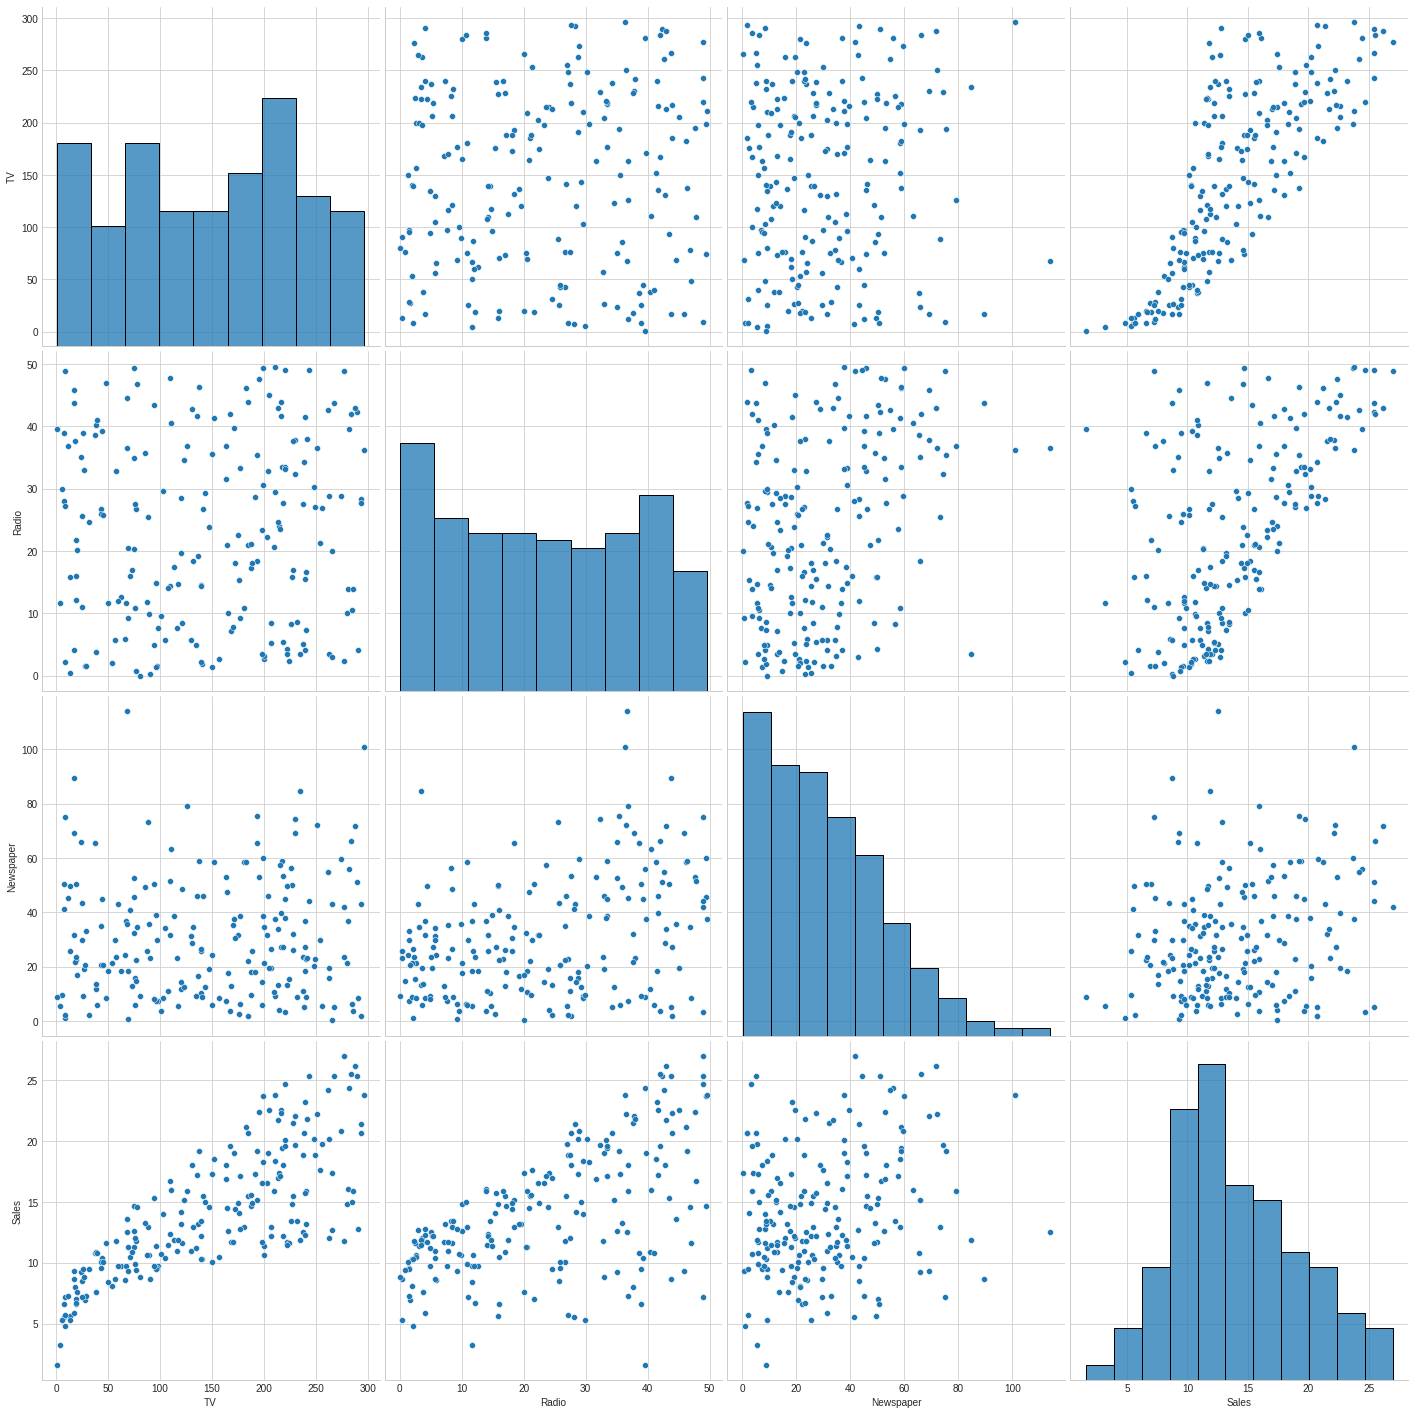

In [23]:
sns.pairplot(df, size=5)

In [36]:
x=np.array(df.drop(["Sales"],1))
y=np.array(df["Sales"])
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.20, random_state=0)
#aprint(message.shape)
model=LinearRegression()
model.fit(xtrain,ytrain)
ypread=model.predict(xtest)
data=pd.DataFrame(data={"Predicated sales":ypread.flatten()})
print(data)

    Predicated sales
0          10.057396
1           7.452281
2           7.019708
3          24.080297
4          12.017863
5           6.537939
6          12.782869
7          15.109746
8          10.769740
9          16.343580
10         22.882975
11          9.129245
12         10.464557
13         15.487436
14         11.585556
15         12.172969
16         18.765515
17         10.783186
18         15.905160
19         17.306513
20         24.066921
21          9.598342
22         15.135122
23         12.385915
24          5.713609
25         15.247493
26         12.294023
27         20.942117
28         13.409916
29          9.043488
30         12.892394
31         21.402720
32         18.138022
33         21.173208
34          6.569744
35          6.141142
36          7.890184
37         13.015414
38         14.689538
39          6.188351


<ipython-input-36-7f692b0e5a7d>:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

